In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [101]:
# 한글 폰트 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # 예시 경로, 시스템에 맞게 조정
font_prop = fm.FontProperties(fname=font_path, size=14)

# matplotlib의 기본 폰트를 한글 폰트로 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호가 깨지는 문제 방지

In [102]:
current_ordinary_expenditures = {
    "laber": 8_000_000,
    "server": 1_000_000,
    "marketing": 500_000,
    "insurances": 803_440
}

pg_charge_percentage = 3.3

# 영업이익 계산
# (매출액 - PG 수수료) * 매출액 수수료율
def calc_operating_profit(sales: int, sales_commission_percentage: float) -> int:
    pg_charge = sales * pg_charge_percentage / 100
    return round((sales - pg_charge) * sales_commission_percentage / 100)

# 순이익 계산 (수수료 포함)
# 순이익 = 영업이익 - (인건비 + 서버비 + 마케팅비 + 보험료) - 법인세
def calc_sales_commission_with_expenditures(operating_profit: int) -> int:
    income = operating_profit - sum(current_ordinary_expenditures.values())
    if income < 0:
        return income
    else:
        return income - calc_comprehensive_income_tax(income)

# 법인세
# 2억 이하: 9%
# 2억 초과 200억 이하: 19% - 2000만원 공제
def calc_comprehensive_income_tax(operating_profit: int) -> int:
    if operating_profit < 0:
        return 0
    year_sales = operating_profit * 12
    if year_sales < 200_000_000: # 2억
        return operating_profit * 0.09
    elif year_sales < 20_000_000_000: # 200억
        return max(0, operating_profit * 0.19 - 20_000_000)
    else:
        print("매출액이 200억 이상입니다.")
        assert year_sales >= 2_000_000_000

In [103]:
sales_matrix = [i for i in range(60_000_000, 200_000_000, 10_000_000)] 

sales_commission_percentage_matrix = [ i for i in range(4, 9, 2) ]

result = pd.DataFrame(columns=["매출액", "영업 수수료(%)", "영업 이익", "순이익", "순이익율(%)"])

for sales in sales_matrix:
    for sales_commission_percentage in sales_commission_percentage_matrix:

        operating_profit = calc_operating_profit(sales, sales_commission_percentage)
        sales_commission = calc_sales_commission_with_expenditures(operating_profit)

        result = result.append({
            "매출액": sales,
            "영업 수수료(%)": sales_commission_percentage,
            "영업 이익": operating_profit,
            "순이익": sales_commission,
            "순이익율(%)": round(sales_commission / sales * 100, 2),
        }, ignore_index=True)

/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_24215/3418488662.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_24215/3418488662.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_24215/3418488662.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_24215/3418488662.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50

In [104]:
sales = 0
step = 1_000_000

while True:
    sales += step
    operating_profit = calc_operating_profit(sales, 8.0)
    sales_commission = calc_sales_commission_with_expenditures(operating_profit)

    if sales_commission >= 0:
        print(f"손익분기점: {sales:,}")
        break


손익분기점: 134,000,000


In [105]:
# sort by 순이익율(%), 매출액 column
result = result.sort_values(by=["영업 수수료(%)", "매출액"])

In [106]:
# reduce number divide by 1,000
result["매출액"] = result["매출액"] / 1_000
result["영업 이익"] = result["영업 이익"] / 1_000
result["순이익"] = round(result["순이익"] / 1_000)


In [107]:
# append comma to number
result["매출액"] = result["매출액"].apply(lambda x: f"{x:,}")
result["영업 이익"] = result["영업 이익"].apply(lambda x: f"{x:,}")
result["순이익"] = result["순이익"].apply(lambda x: f"{x:,}")

In [108]:
result.head(10)

,매출액,영업 수수료(%),영업 이익,순이익,순이익율(%)
0,"60,000.0",4.0,"2,320.8","-7,983.0",-13.30
3,"70,000.0",4.0,"2,707.6","-7,596.0",-10.85
6,"80,000.0",4.0,"3,094.4","-7,209.0",-9.01
9,"90,000.0",4.0,"3,481.2","-6,822.0",-7.58
12,"100,000.0",4.0,"3,868.0","-6,435.0",-6.44
15,"110,000.0",4.0,"4,254.8","-6,049.0",-5.50
18,"120,000.0",4.0,"4,641.6","-5,662.0",-4.72
21,"130,000.0",4.0,"5,028.4","-5,275.0",-4.06
24,"140,000.0",4.0,"5,415.2","-4,888.0",-3.49
27,"150,000.0",4.0,"5,802.0","-4,501.0",-3.00


In [109]:
result.tail(10)

,매출액,영업 수수료(%),영업 이익,순이익,순이익율(%)
14,"100,000.0",8.0,"7,736.0","-2,567.0",-2.57
17,"110,000.0",8.0,"8,509.6","-1,794.0",-1.63
20,"120,000.0",8.0,"9,283.2","-1,020.0",-0.85
23,"130,000.0",8.0,"10,056.8",-247.0,-0.19
26,"140,000.0",8.0,"10,830.4",480.0,0.34
29,"150,000.0",8.0,"11,604.0","1,184.0",0.79
32,"160,000.0",8.0,"12,377.6","1,887.0",1.18
35,"170,000.0",8.0,"13,151.2","2,591.0",1.52
38,"180,000.0",8.0,"13,924.8","3,295.0",1.83
41,"190,000.0",8.0,"14,698.4","3,999.0",2.10


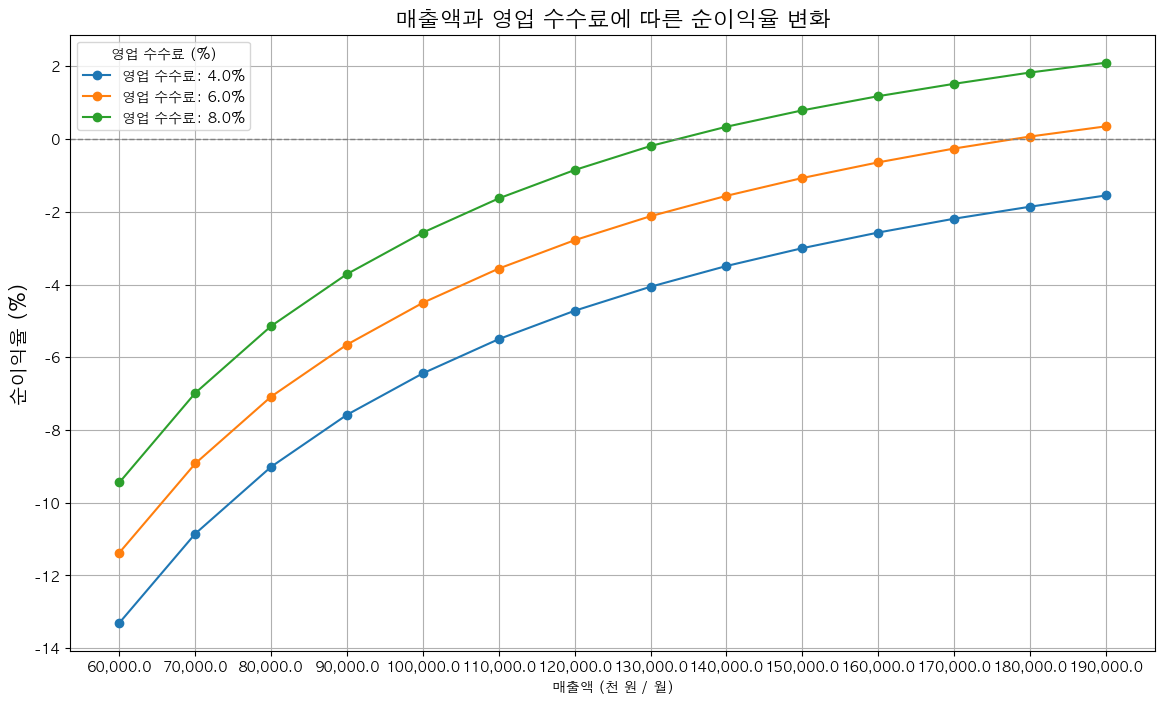

In [110]:
# x 축: 매출액, y 축: 순이익율(%)
# x 축 스케일: 천 원, y 축 스케일: %
# x 축 step: 50,000 * 1000, y 축 step: 1

plt.figure(figsize=(14, 8))
for commission in result['영업 수수료(%)'].unique():
    subset = result[result['영업 수수료(%)'] == commission]
    plt.plot(subset['매출액'], subset['순이익율(%)'], marker='o', label=f'영업 수수료: {commission}%')

plt.xlabel('매출액 (천 원 / 월)', fontsize=10)
plt.ylabel('순이익율 (%)', fontsize=14)
plt.title('매출액과 영업 수수료에 따른 순이익율 변화', fontsize=16)
plt.axhline(0, color='grey', lw=1, ls='--')  # Add a horizontal line at y=0
plt.legend(title='영업 수수료 (%)')
plt.grid(True)
plt.show()

In [111]:
result.to_csv("result.csv", index=False)